In [64]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Filename

In [65]:
filename = 'test_ising.dat'
data = json.load(open(filename))

# Simulation

In [66]:
print('Number of spins', data['nspins'])
print('Beta', data['beta'])
print('Optimizer', data['optimizer'])
print('Gradient', data['gradient'])
print('Backend', data['backend'])
print('Shots', data['shots'])
print('Learning rate', data['learning_rate'])
print('Number of layers', data['nlayer'])
print('Threshold', data['threshold'])
print('Final coupling', data['final_coupling'])

Number of spins 3
Beta 5.0
Optimizer sgd
Gradient spsa
Backend qasm_simulator
Shots 8192
Learning rate 0.01
Number of layers 3
Threshold 1e-06
Final coupling 1.5


# Variational Energy

Final beta:  30.622587261952983


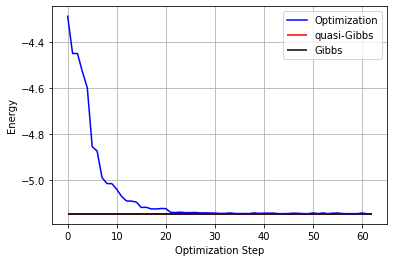

In [67]:
from analytic import *
from hamiltonian import generate_XYZ


beta = data['beta']
nspins = data['nspins']
J = data['final_coupling']
exact, best = get_exact_and_best_for_ising(beta, nspins, final_parameters=(-J, -1.))

plt.figure()
plt.plot(data['variational_energy'], 'b', label='Optimization')
plt.xlabel('Optimization Step')
plt.ylabel('Energy')
plt.grid()
plt.hlines(best, color='r', xmin=0, xmax=len(data['variational_energy']), label='quasi-Gibbs')
plt.hlines(exact, color='k', xmin=0, xmax=len(data['variational_energy']), label='Gibbs')
plt.legend()